In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.datasets import make_moons, load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingRegressor
import xgboost

In [2]:
X,y = make_moons(n_samples=2000, noise=0.3, random_state=42)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [43]:
forest_clf = RandomForestClassifier(n_estimators=100)
log_clf = LogisticRegression(solver="lbfgs", random_state=42)
svm_clf = SVC(gamma='scale')

Hard

In [44]:
voting_clf = VotingClassifier(estimators=[('lr',log_clf), ('rf',forest_clf), ('svm',svm_clf)],
                              voting='hard')
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('rf', RandomForestClassifier()), ('svm', SVC())])

In [45]:
for clf in (forest_clf, log_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

RandomForestClassifier 0.9
LogisticRegression 0.86
SVC 0.908
VotingClassifier 0.906


Soft

In [46]:
svm_clf = SVC(probability=True)

voting_clf = VotingClassifier(estimators=[('lr',log_clf), ('rf',forest_clf), ('svm',svm_clf)],
                              voting='soft')
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('rf', RandomForestClassifier()),
                             ('svm', SVC(probability=True))],
                 voting='soft')

In [47]:
for clf in (forest_clf, log_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

RandomForestClassifier 0.9
LogisticRegression 0.86
SVC 0.908
VotingClassifier 0.904


Bagging

In [50]:
tree_clf = DecisionTreeClassifier()
bag_clf = BaggingClassifier(tree_clf, n_estimators=500, max_samples=100, bootstrap=True, n_jobs=-1)

In [51]:
bag_clf.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), max_samples=100,
                  n_estimators=500, n_jobs=-1)

In [52]:
y_pred = bag_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.902

In [53]:
tree_clf = DecisionTreeClassifier()
bag_clf = BaggingClassifier(tree_clf, n_estimators=500, max_samples=100, bootstrap=True, n_jobs=-1, oob_score=True)
bag_clf.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), max_samples=100,
                  n_estimators=500, n_jobs=-1, oob_score=True)

In [54]:
bag_clf.oob_score_

0.9173333333333333

In [55]:
y_pred = bag_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.9

In [56]:
forest_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1)
forest_clf.fit(X_train, y_train)

y_pred = forest_clf.predict(X_test)

accuracy_score(y_test, y_pred)

0.902

In [58]:
bag_clf = BaggingClassifier(estimator=DecisionTreeClassifier(splitter='random', max_leaf_nodes=16),
                            n_estimators=500, max_samples=1.0, bootstrap=True, n_jobs=-1)
bag_clf.fit(X_train, y_train)

y_pred = bag_clf.predict(X_test)

accuracy_score(y_test, y_pred)

0.902

In [59]:
forest_clf.feature_importances_

array([0.42742039, 0.57257961])

In [62]:
iris = load_iris()

In [63]:
forest_clf = RandomForestClassifier(n_estimators=500, n_jobs=-1)

In [64]:
forest_clf.fit(iris['data'], iris['target'])

RandomForestClassifier(n_estimators=500, n_jobs=-1)

In [65]:
for name, score in zip(iris['feature_names'], forest_clf.feature_importances_):
    print(name, score)

sepal length (cm) 0.09375268739478032
sepal width (cm) 0.023315711117219178
petal length (cm) 0.4338405736464702
petal width (cm) 0.44909102784153027


Boosting

In [5]:
ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),
                             n_estimators=200, algorithm='SAMME.R', learning_rate=0.5)

In [6]:
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.5, n_estimators=200)

In [7]:
y_pred = ada_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.91

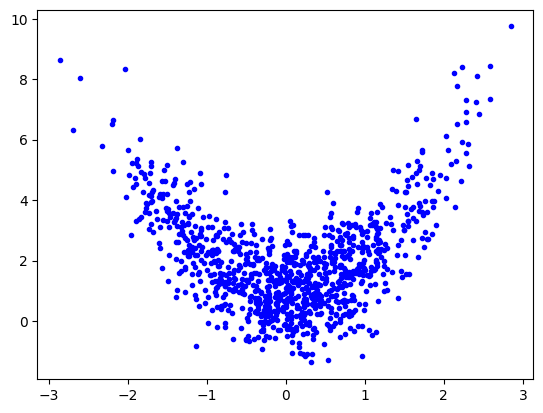

In [36]:
X = np.random.randn(1000,1)
y = X**2 + 1 + np.random.randn(1000,1)

plt.plot(X.ravel(), y, 'b.')
plt.show()

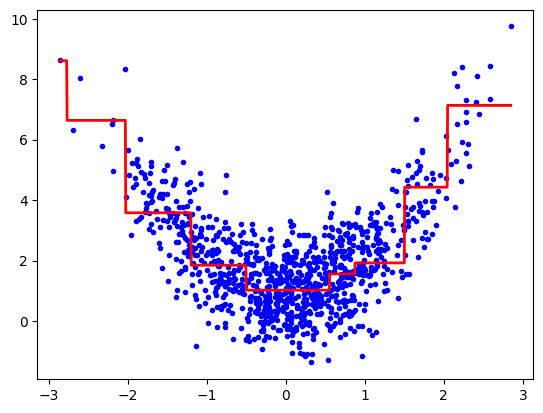

In [96]:
grad_reg = GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=1.0)
grad_reg.fit(X, y.ravel())

x = np.linspace(min(X), max(X), 1000)
y_pred = grad_reg.predict(x.reshape(-1, 1))

plt.plot(X.ravel(), y.ravel(), 'b.')
plt.plot(x, y_pred, 'r-', lw=2)
plt.show()

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y.ravel())

In [99]:
gbrt_reg = GradientBoostingRegressor(max_depth=2, n_estimators=120)
gbrt_reg.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=2, n_estimators=120)

In [103]:
errors = [mean_squared_error(y_test, y_pred) for y_pred in gbrt_reg.staged_predict(X_test)]
n_best_est = np.argmin(errors)

In [104]:
gbrt_reg_best = GradientBoostingRegressor(max_depth=2, n_estimators=n_best_est)
gbrt_reg_best.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=2, n_estimators=73)

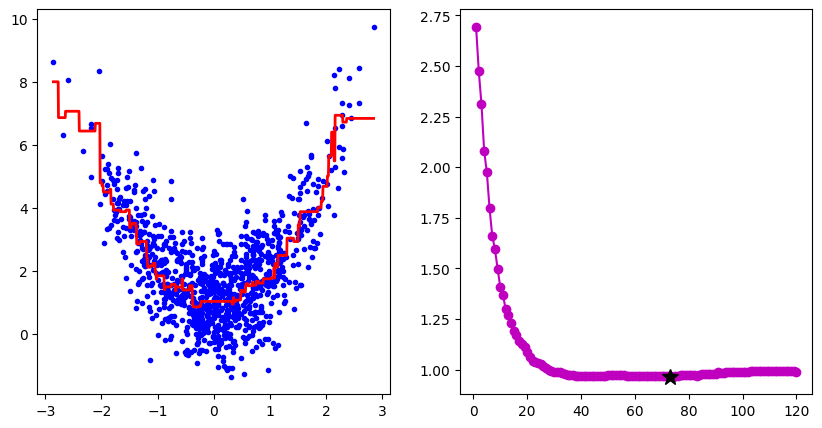

In [115]:
x = np.linspace(min(X), max(X), 1000)
y_pred = gbrt_reg_best.predict(x.reshape(-1, 1))

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.plot(X.ravel(), y.ravel(), 'b.')
plt.plot(x, y_pred, 'r-', lw=2)

plt.subplot(1,2,2)
plt.plot(np.arange(1,len(errors)+1), errors, 'm-o')
plt.plot(n_best_est, min(errors), 'k*', markersize=12)

plt.show()

XGBoost

In [139]:
xgb_reg = xgboost.XGBRegressor()

In [140]:
xgb_reg.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

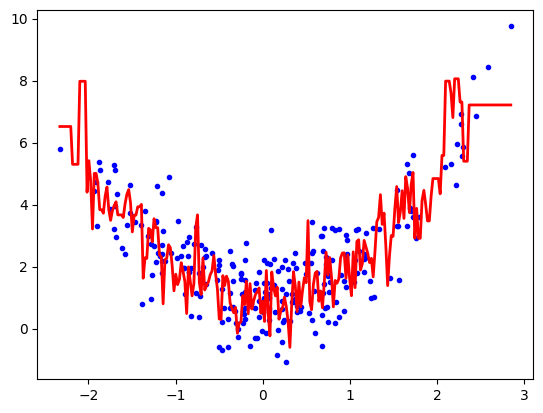

In [141]:
x = np.linspace(min(X_test), max(X_test), 250)

y_pred = xgb_reg.predict(x)

plt.plot(X_test.ravel(), y_test, 'b.')
plt.plot(x, y_pred, 'r-', lw=2)
plt.show()

In [142]:
xgb_reg.fit(X_train, y_train, eval_set=[(X_test, y_test)], early_stopping_rounds=2)

[0]	validation_0-rmse:1.83308
[1]	validation_0-rmse:1.47995
[2]	validation_0-rmse:1.27825
[3]	validation_0-rmse:1.14792
[4]	validation_0-rmse:1.09074
[5]	validation_0-rmse:1.05665
[6]	validation_0-rmse:1.03391
[7]	validation_0-rmse:1.03673


c:\Users\Marcos\AppData\Local\Programs\Python\Python38\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

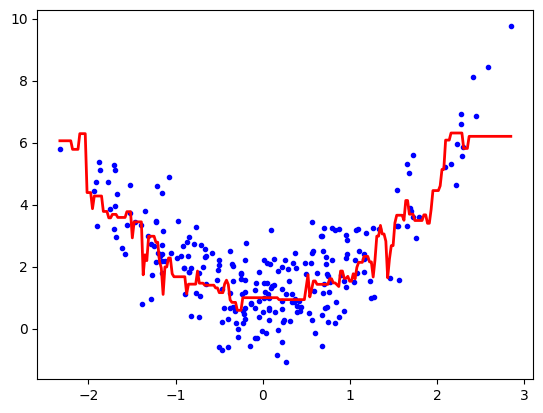

In [143]:
y_pred = xgb_reg.predict(x)

plt.plot(X_test.ravel(), y_test, 'b.')
plt.plot(x, y_pred, 'r-', lw=2)
plt.show()